In [1]:
#VGG16: https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
#FGSM:  https://www.tensorflow.org/tutorials/generative/adversarial_fgsm

In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [14]:
# load the model
pretrained_model = VGG16(weights='imagenet', include_top=True)
pretrained_model.trainable = False

ValueError: When setting `include_top=True` and loading `imagenet` weights, `input_shape` should be (224, 224, 3).

In [3]:
image_path = 'elephant.jpg'

In [4]:
image = load_img(image_path, target_size=(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
image = tf.convert_to_tensor(image)
#image

In [7]:
# Helper function to preprocess the image so that it can be inputted in VGG16
def preprocess(image_path):
    # load an image from file as a PIL
    image = load_img(image_path, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    return image

In [8]:
# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
    return decode_predictions(probs, top=1)[0][0]

In [9]:
image = preprocess(image_path)
image_probs = pretrained_model.predict(image)
image.shape

(1, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


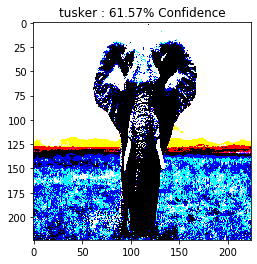

In [10]:
plt.figure()
plt.imshow(image[0])
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

In [11]:
# creating the adversarial sample

In [12]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(pretrained_model, input_image, input_label):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = pretrained_model(input_image)
        loss = loss_object(input_label, prediction)
    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad

NotImplementedError: Cannot convert a symbolic Tensor (strided_slice:0) to a numpy array.

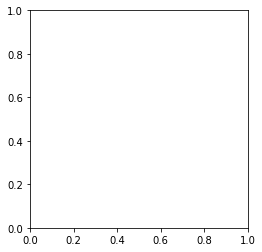

In [13]:
# Get the input label of the image.
labrador_retriever_index = 208
label = tf.one_hot(labrador_retriever_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

#convert image numpy to tensor.
tensor = tf.convert_to_tensor(image)

perturbations = create_adversarial_pattern(pretrained_model, tensor, label)
# perturbations[0]
plt.imshow(perturbations[0])
# perturbations = perturbations.eval()
#perturbations

In [15]:
image

array([[[[ -8.939003 ,  44.221    ,  32.32     ],
         [ -3.939003 ,  45.221    ,  32.32     ],
         [ 12.060997 ,  59.221    ,  41.32     ],
         ...,
         [-20.939003 ,  22.221    ,  10.32     ],
         [-22.939003 ,  22.221    ,  10.32     ],
         [-23.939003 ,  21.221    ,   9.32     ]],

        [[-10.939003 ,  40.221    ,  27.32     ],
         [ -3.939003 ,  46.221    ,  30.32     ],
         [ 11.060997 ,  60.221    ,  41.32     ],
         ...,
         [-11.939003 ,  32.221    ,  17.32     ],
         [-20.939003 ,  25.221    ,  10.32     ],
         [-12.939003 ,  34.221    ,  19.32     ]],

        [[-14.939003 ,  35.221    ,  19.32     ],
         [ -9.939003 ,  40.221    ,  23.32     ],
         [ -3.939003 ,  49.221    ,  30.32     ],
         ...,
         [ -7.939003 ,  39.221    ,  22.32     ],
         [ -4.939003 ,  43.221    ,  26.32     ],
         [-11.939003 ,  38.221    ,  21.32     ]],

        ...,

        [[-36.939003 ,  -8.778999 , -2